
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

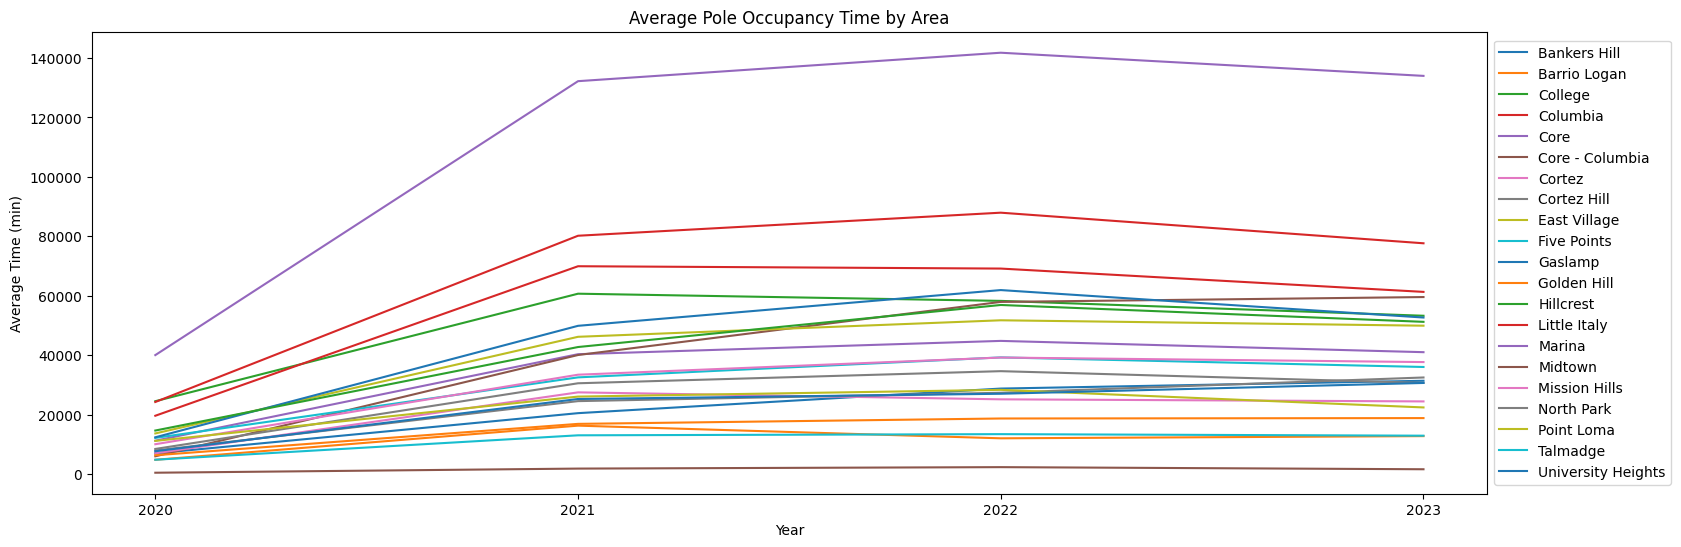

In [9]:

# Read four CSV files
data_2020 = pd.read_csv('parking_time_by_area_week_2020.csv')
data_2021 = pd.read_csv('parking_time_by_area_week_2021.csv')
data_2022 = pd.read_csv('parking_time_by_area_week_2022.csv')
data_2023 = pd.read_csv('parking_time_by_area_week_2023.csv')
# Calculate the average time per area per year
avg_2020 = data_2020.groupby('area')['time_period_min_per_pole'].mean().reset_index().rename(columns={'time_period_min_per_pole': 'avg_2020'})
avg_2021 = data_2021.groupby('area')['time_period_min_per_pole'].mean().reset_index().rename(columns={'time_period_min_per_pole': 'avg_2021'})
avg_2022 = data_2022.groupby('area')['time_period_min_per_pole'].mean().reset_index().rename(columns={'time_period_min_per_pole': 'avg_2022'})
avg_2023 = data_2023.groupby('area')['time_period_min_per_pole'].mean().reset_index().rename(columns={'time_period_min_per_pole': 'avg_2023'})
# Merge four years of data
merged = pd.merge(avg_2020, avg_2021, on='area')
merged = pd.merge(merged, avg_2022, on='area')
merged = pd.merge(merged, avg_2023, on='area')
####################################################################
# Draw a line chart
fig, ax = plt.subplots(figsize=(18, 6))
for area, group in merged.groupby('area'):
    ax.plot([group['avg_2020'], group['avg_2021'], group['avg_2022'], group['avg_2023']], label=area)
ax.set_xlabel('Year')
ax.set_ylabel('Average Time (min)')
ax.set_title('Average Pole Occupancy Time by Area')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['2020', '2021', '2022', '2023'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

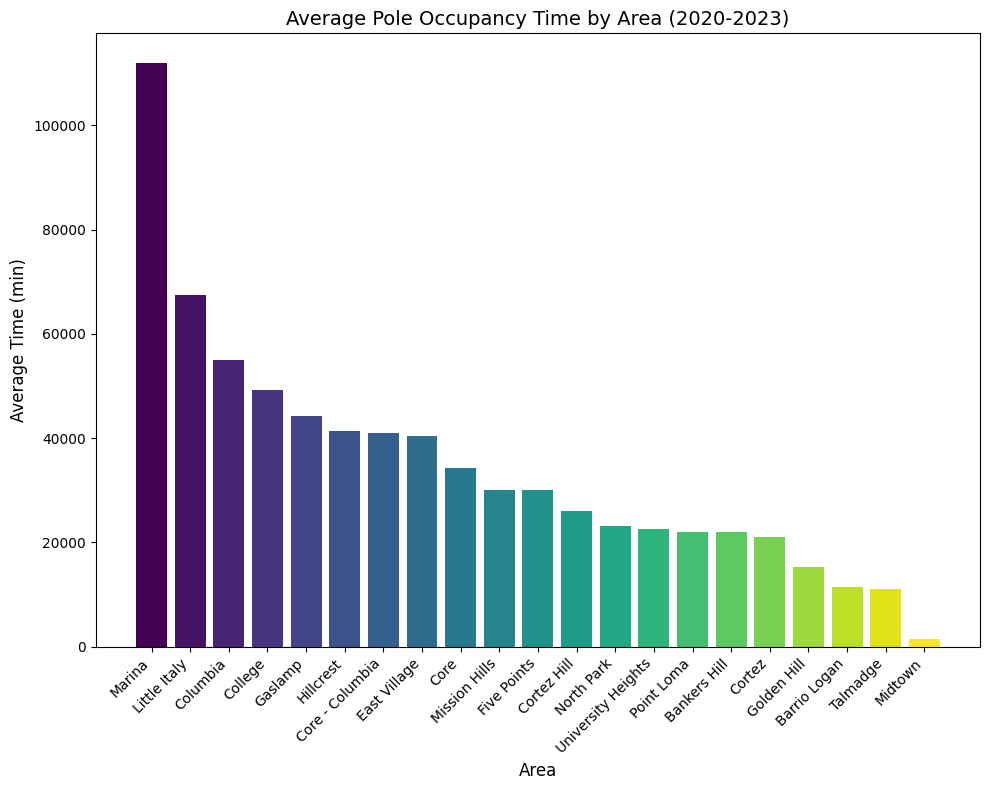

In [10]:
# Create a combined average for each area across the four years
merged['avg_time_2020_2023'] = merged[['avg_2020', 'avg_2021', 'avg_2022', 'avg_2023']].mean(axis=1)

# Sort the DataFrame based on the new average time in descending order
merged_sorted = merged.sort_values('avg_time_2020_2023', ascending=False)

# Plotting bar graph
fig, ax = plt.subplots(figsize=(10, 8))
areas = merged_sorted['area']
avg_time = merged_sorted['avg_time_2020_2023']
colors = plt.cm.viridis(np.linspace(0, 1, len(areas)))

ax.bar(areas, avg_time, color=colors)
ax.set_xlabel('Area', fontsize=12)
ax.set_ylabel('Average Time (min)', fontsize=12)
ax.set_title('Average Pole Occupancy Time by Area (2020-2023)', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()